In [153]:
from matplotlib import pyplot as plt

In [186]:
def plot(points):
    fig = plt.figure(figsize=[20, 20])
    for p in points:
        plt.plot(p[0], p[1], points[p])
    plt.show()

def dist_Euclidean(vec1, vec2):
    if len(vec1) != len(vec2):
        raise ValueError("Vectors' length doesn't match")
    return float(sqrt(sum([(vec1[i] - vec2[i])^2 for i in range(len(vec1))])))

class Lattice(object):
    def __init__(self, basis, verbose=False):
        self.verbose = verbose
        self.B = basis
        if len(self.B) != 2:
            raise ValueError('Only lattices over Z^2 are supported (two dimensional)')

    def solve_cvp(self, target):
        z1, z2 = var('z1,z2')
        b1, b2 = self.B[0], self.B[1]
        eqn = [b1[0]*z1 + b2[0]*z2 == target[0], b1[1]*z1 + b2[1]*z2 == target[1]]
        s = solve(eqn, z1, z2)
        if self.verbose: print("CVP solution in R: {}".format(s))
        return s[0][0].right().round()*b1 + s[0][1].right().round()*b2 # z1*b1 + z2*b2

    def points_to_plot(self, z1_range, z2_range, plt_style='ko-'):
        b1, b2 = self.B[0], self.B[1]
        points = {}
        # brute points within given boundaries
        for z1 in z1_range:
            for z2 in z2_range:
                new_point = b1*z1 + b2*z2
                points[(new_point[0], new_point[1])] = plt_style
        return points

    def basis_to_plot(self, plt_style='bo-'):
        b1 = self.B[0]
        b2 = self.B[1]
        bsum = b1+b2
        return {
            ((0, b1[0],bsum[0]), (0, b1[1],bsum[1])) : plt_style,
            ((0, b2[0],bsum[0]), (0, b2[1],bsum[1])) : plt_style
        }

In [0]:
B_good = [vector(ZZ, (1,4)),vector(ZZ, (5,1))]
B_bad = [
    B_good[0]+4*B_good[1],
    B_good[0]+5*B_good[1]
]

In [187]:
l1 = Lattice(B_good, True)
l2 = Lattice(B_bad, True)

<Figure size 2160x2160 with 0 Axes>

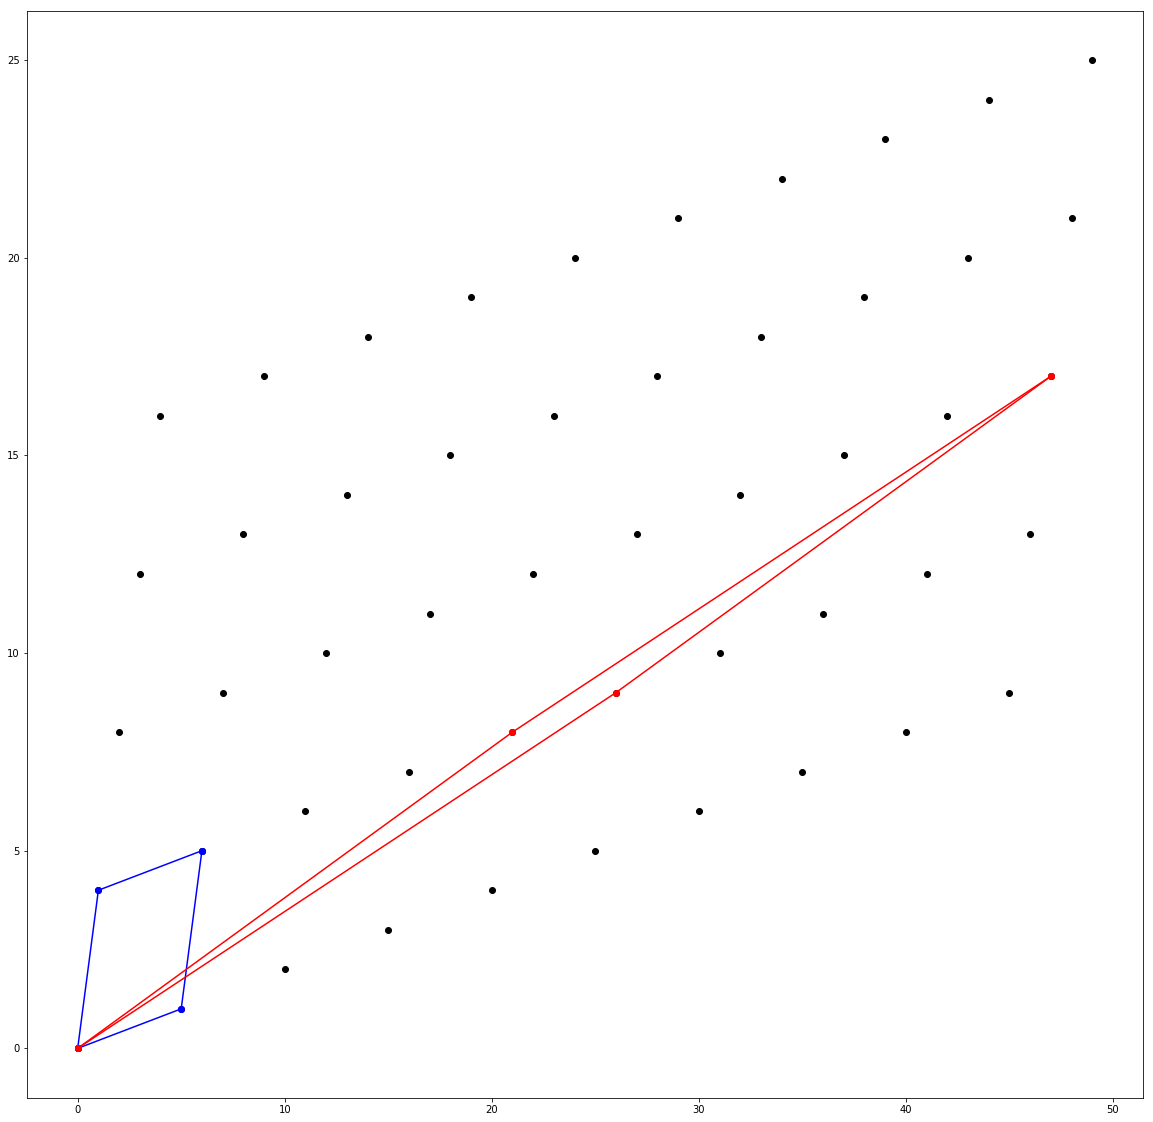

In [194]:
# plot lattice basis parallelograms
fig = plt.figure(figsize=[30, 30])
points = l1.points_to_plot(range(0, 5), range(0, 10))
points.update(l1.basis_to_plot())
points.update(l2.basis_to_plot('ro-'))
plot(points)

In [195]:
# solve CVP with short and long basis
svp_target = vector(ZZ, (4,2))

r1 = l1.solve_cvp(svp_target)
r2 = l2.solve_cvp(svp_target)

print("Short basis yields {} ({} - Euclidean distance to target)".format(r1, dist_Euclidian(r1, svp_target)))
print("Short basis yields {} ({} - Euclidean distance to target)".format(r2, dist_Euclidian(r2, svp_target)))

CVP solution in R: [
[z1 == (6/19), z2 == (14/19)]
]
CVP solution in R: [
[z1 == (16/19), z2 == (-10/19)]
]
Short basis yields (5, 1) (1.4142135623730951 - Euclidean distance to target)
Short basis yields (-5, -1) (9.486832980505138 - Euclidean distance to target)


<Figure size 2160x2160 with 0 Axes>

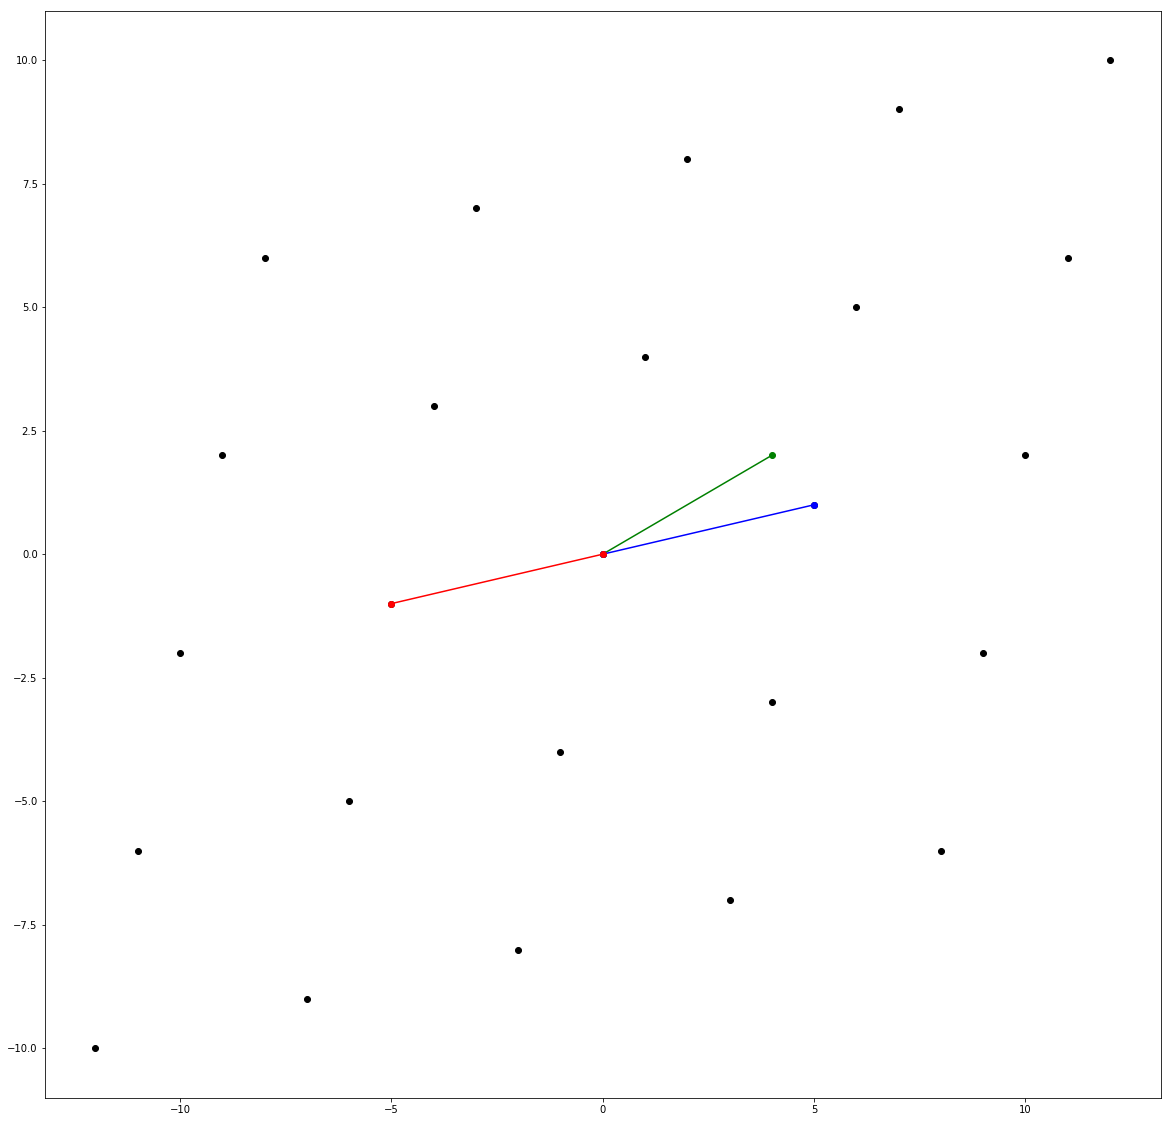

In [198]:
# plot CVP solutions
fig = plt.figure(figsize=[30, 30])
points = l1.points_to_plot(range(-2, 3), range(-2, 3))
points.update( # CVP target
    {
        ((0, svp_target[0]), (0, svp_target[1])) : 'go-'
    }
)
points.update( # short basis solution
    {
        ((0, r1[0]), (0, r1[1])) : 'bo-'
    }
)
points.update( # long basis solution
    {
        ((0, r2[0]), (0, r2[1])) : 'ro-'
    }
)
plot(points)